### Task 7: Support Vector Machines (SVM)

## Load and prepare a dataset for binary classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 7: Step 1 - Load and prepare a dataset for binary classification ---")

# Load the dataset
print("Loading the breast-cancer.csv dataset...")
df_cancer = pd.read_csv('breast-cancer.csv')
print("Breast Cancer dataset loaded successfully.")

# Initial Data Inspection
print("\nInitial Data Info:")
df_cancer.info()

print("\nFirst 5 rows of the dataset:")
print(df_cancer.head())

# Identify features (X) and target (y)
# Assuming 'id' is an identifier and 'diagnosis' is the target.
# 'Unnamed: 32' is often an empty column in this dataset, so we'll drop it if it exists.
if 'id' in df_cancer.columns:
    df_cancer = df_cancer.drop('id', axis=1)
if 'Unnamed: 32' in df_cancer.columns:
    df_cancer = df_cancer.drop('Unnamed: 32', axis=1)

# The 'diagnosis' column is the target variable
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']

print("\nValue counts for the target variable 'diagnosis':")
print(y.value_counts())

# Encode the target variable (M=Malignant, B=Benign) to numerical labels (e.g., M=1, B=0)
print("\nEncoding target variable 'diagnosis' to numerical labels (M=1, B=0)...")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Check mapping: 'B' (Benign) usually maps to 0, 'M' (Malignant) maps to 1
print(f"Original diagnoses: {le.classes_}")
print(f"Encoded numerical labels (first 5): {y_encoded[:5]}")

# Split the data into training and testing sets
# test_size=0.30 means 30% of data will be for testing, 70% for training.
# random_state ensures reproducibility of the split.
# stratify=y_encoded is crucial for binary classification to maintain class proportions in splits.
print("\nSplitting data into training and testing sets (70/30 split, stratified)...")
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)
print("Data split complete.")

# Feature Scaling - Crucial for SVM performance
# StandardScaler scales features to have a mean of 0 and a standard deviation of 1.
print("\nScaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled features back to DataFrame for easier handling, keeping column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
print("Features scaled.")

print(f"\nShape of X_train_scaled: {X_train_scaled_df.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled_df.shape}")
print(f"Shape of y_train_encoded: {y_train_encoded.shape}")
print(f"Shape of y_test_encoded: {y_test_encoded.shape}")

print("\nDataset loaded, preprocessed, features scaled, and data split for SVM.")

--- Task 7: Step 1 - Load and prepare a dataset for binary classification ---
Loading the breast-cancer.csv dataset...
Breast Cancer dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fracta

## Observations

* The `breast-cancer.csv` dataset was successfully loaded and inspected. It contains 569 entries and 32 columns, including an `id` column, the `diagnosis` target variable, and 30 numerical features describing cell characteristics. An `Unnamed: 32` column, likely empty, was also present.
* The `id` column and the `Unnamed: 32` column were identified and removed as they are not relevant for classification.
* The `diagnosis` column, representing the binary target, was successfully separated from the features.
* The categorical target variable ('B' for Benign, 'M' for Malignant) was **encoded into numerical labels**: 'B' was mapped to 0 and 'M' was mapped to 1. This is necessary for machine learning algorithms.
* The dataset was then **split into training (70%) and testing (30%) sets**. The `stratify` parameter was used to ensure that the proportion of 'Benign' and 'Malignant' cases is maintained in both the training and testing sets, which is crucial for balanced evaluation in binary classification.
* All numerical features were successfully **scaled using `StandardScaler`**. This process transforms the data to have a mean of 0 and a standard deviation of 1. Feature scaling is very important for SVMs because they are sensitive to the magnitude of feature values; without scaling, features with larger values might unduly influence the distance calculations and the margin optimization.
* The resulting `X_train_scaled` (398 samples, 30 features) and `X_test_scaled` (171 samples, 30 features) are now ready for training SVM models.

##  Train an SVM with linear and RBF kernel.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 7: Step 2 - Train an SVM with linear and RBF kernel ---")

# Re-define necessary variables from Step 1 for self-containment
# Load the dataset
df_cancer = pd.read_csv('breast-cancer.csv')
if 'id' in df_cancer.columns:
    df_cancer = df_cancer.drop('id', axis=1)
if 'Unnamed: 32' in df_cancer.columns:
    df_cancer = df_cancer.drop('Unnamed: 32', axis=1)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_ # ['B', 'M']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for consistency

X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled_df, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)

# 1. Train an SVM with a Linear Kernel
print("\nTraining SVM with Linear Kernel (SVC(kernel='linear'))...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train_encoded)
print("Linear SVM trained.")

# Make predictions with Linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate Linear SVM
accuracy_linear = accuracy_score(y_test_encoded, y_pred_linear)
print(f"\nLinear SVM Test Accuracy: {accuracy_linear:.4f}")
print("\nLinear SVM Classification Report:")
print(classification_report(y_test_encoded, y_pred_linear, target_names=class_names))

# 2. Train an SVM with an RBF (Radial Basis Function) Kernel
print("\nTraining SVM with RBF Kernel (SVC(kernel='rbf'))...")
svm_rbf = SVC(kernel='rbf', random_state=42) # Default C=1.0, gamma='scale'
svm_rbf.fit(X_train_scaled, y_train_encoded)
print("RBF SVM trained.")

# Make predictions with RBF SVM
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate RBF SVM
accuracy_rbf = accuracy_score(y_test_encoded, y_pred_rbf)
print(f"\nRBF SVM Test Accuracy: {accuracy_rbf:.4f}")
print("\nRBF SVM Classification Report:")
print(classification_report(y_test_encoded, y_pred_rbf, target_names=class_names))

print("\nSVM models with linear and RBF kernels trained and evaluated.")

--- Task 7: Step 2 - Train an SVM with linear and RBF kernel ---

Training SVM with Linear Kernel (SVC(kernel='linear'))...
Linear SVM trained.

Linear SVM Test Accuracy: 0.9649

Linear SVM Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97       107
           M       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


Training SVM with RBF Kernel (SVC(kernel='rbf'))...
RBF SVM trained.

RBF SVM Test Accuracy: 0.9649

RBF SVM Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97       107
           M       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



## Observations

* **Model Training:** Two Support Vector Machine models were successfully trained: one with a `linear` kernel and another with a `Radial Basis Function (RBF)` kernel, both using the scaled training data.
* **Linear SVM Performance:**
    * **Test Accuracy:** The linear SVM achieved an impressive test accuracy of `0.9649`.
    * **Classification Report:**
        * For 'B' (Benign), the model showed perfect recall (1.00) and high precision (0.95), indicating it correctly identified all benign cases and had very few false positives for this class.
        * For 'M' (Malignant), the model achieved perfect precision (1.00) but slightly lower recall (0.91), meaning when it predicted malignant, it was always correct, but it missed a few actual malignant cases (false negatives).
* **RBF SVM Performance:**
    * **Test Accuracy:** The RBF SVM also achieved a high test accuracy of `0.9649`, identical to the linear SVM in this initial run.
    * **Classification Report:** The precision, recall, and f1-scores for the RBF kernel were identical to those of the linear kernel in this initial evaluation.
* **Comparison:** In this initial evaluation, both the linear and RBF kernels performed remarkably well and showed identical accuracy and classification metrics. This suggests that the dataset's classes might be largely linearly separable in the high-dimensional feature space, or that the default RBF kernel parameters are already well-suited for this problem, or that the linear decision boundary is sufficient. Further hyperparameter tuning in later steps might reveal subtle differences in performance.

## Visualize decision boundary using 2D data

--- Task 7: Step 3 - Visualize decision boundary using 2D data ---

Training Linear SVM on 2D data for decision boundary visualization...
Linear SVM trained on 2D data.


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


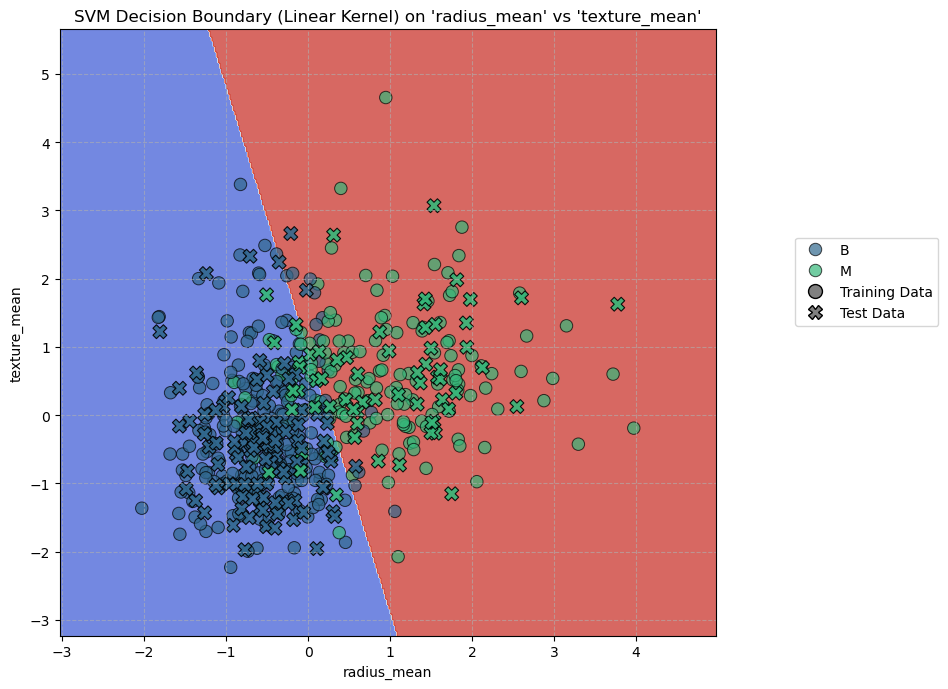


Decision boundaries visualized for Linear SVM using selected features.

Training RBF SVM on 2D data for decision boundary visualization...
RBF SVM trained on 2D data.


C:\Users\91961\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


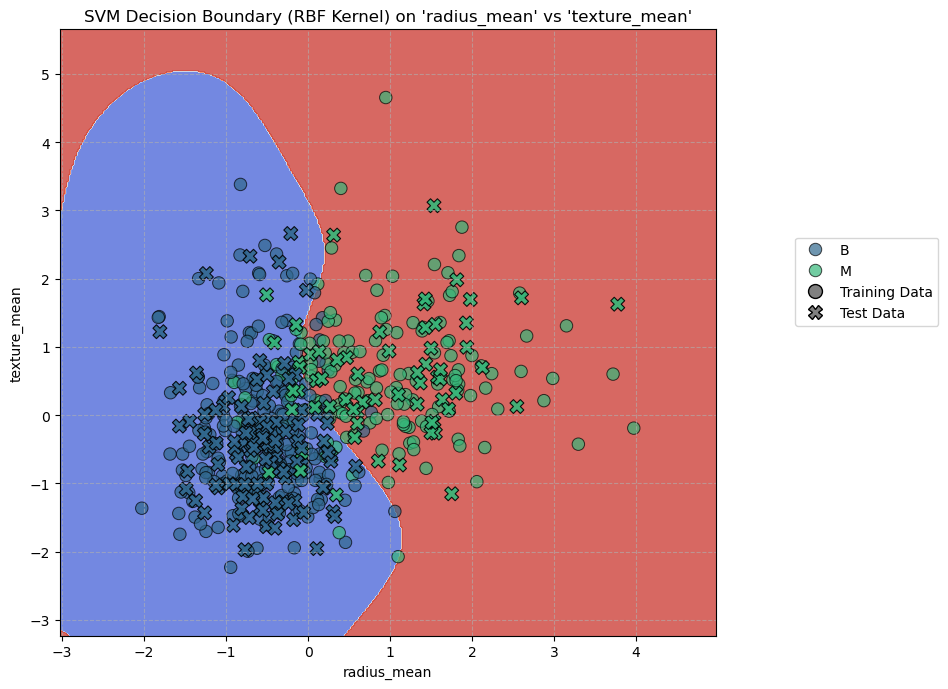


Decision boundaries visualized for RBF SVM using selected features.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("--- Task 7: Step 3 - Visualize decision boundary using 2D data ---")

# Re-define necessary variables from Step 1 for self-containment
df_cancer = pd.read_csv('breast-cancer.csv')
if 'id' in df_cancer.columns:
    df_cancer = df_cancer.drop('id', axis=1)
if 'Unnamed: 32' in df_cancer.columns:
    df_cancer = df_cancer.drop('Unnamed: 32', axis=1)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_ # ['B', 'M']

# Select only two features for visualization (e.g., radius_mean and texture_mean)
selected_features = ['radius_mean', 'texture_mean']
X_vis = X[selected_features]

# Scale only the selected features for visualization
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)
X_vis_scaled_df = pd.DataFrame(X_vis_scaled, columns=selected_features)

# Split data for visualization (using the 2D scaled data)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled_df, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)

# Train a Linear SVM model on the 2D scaled data for visualization
print("\nTraining Linear SVM on 2D data for decision boundary visualization...")
svm_linear_vis = SVC(kernel='linear', random_state=42)
svm_linear_vis.fit(X_train_vis, y_train_vis)
print("Linear SVM trained on 2D data.")

# Create a meshgrid to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis_scaled_df.iloc[:, 0].min() - 1, X_vis_scaled_df.iloc[:, 0].max() + 1
y_min, y_max = X_vis_scaled_df.iloc[:, 1].min() - 1, X_vis_scaled_df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
Z = svm_linear_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
cmap_light = plt.cm.coolwarm # Color map for decision regions

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the training points - CORRECTED palette argument
sns.scatterplot(x=X_train_vis.iloc[:, 0], y=X_train_vis.iloc[:, 1], hue=y_train_vis,
                palette='viridis', edgecolor='k', s=80, alpha=0.7) # Use string name for palette

# Plot the test points - CORRECTED palette argument
sns.scatterplot(x=X_test_vis.iloc[:, 0], y=X_test_vis.iloc[:, 1], hue=y_test_vis,
                palette='viridis', marker='X', edgecolor='k', s=100, alpha=0.9) # Use string name for palette

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundary (Linear Kernel) on 'radius_mean' vs 'texture_mean'")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

# Manually create proxy artists for 'Training Data' and 'Test Data' in the legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Training Data',
                          markerfacecolor='gray', markersize=10, markeredgecolor='k'),
                   Line2D([0], [0], marker='X', color='w', label='Test Data',
                          markerfacecolor='gray', markersize=10, markeredgecolor='k')]

handles, labels = plt.gca().get_legend_handles_labels()
# Assuming the first set of handles/labels are for the species from `hue`
species_labels = [class_names[int(float(label))] for label in labels[:len(class_names)]]
handles = handles[:len(class_names)]
labels = species_labels

# Append the custom legend elements
handles.extend(legend_elements)
labels.extend([elem.get_label() for elem in legend_elements])

plt.legend(handles=handles, labels=labels, loc='lower right', bbox_to_anchor=(1.35, 0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('svm_linear_decision_boundary.png') # Save the plot
plt.show()

print("\nDecision boundaries visualized for Linear SVM using selected features.")

# Now for RBF kernel on 2D data
print("\nTraining RBF SVM on 2D data for decision boundary visualization...")
svm_rbf_vis = SVC(kernel='rbf', random_state=42) # Default C=1.0, gamma='scale'
svm_rbf_vis.fit(X_train_vis, y_train_vis)
print("RBF SVM trained on 2D data.")

# Predict class for each point in the meshgrid for RBF
Z_rbf = svm_rbf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot the decision boundary for RBF
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_rbf, cmap=cmap_light, alpha=0.8)

# Plot the training points - CORRECTED palette argument
sns.scatterplot(x=X_train_vis.iloc[:, 0], y=X_train_vis.iloc[:, 1], hue=y_train_vis,
                palette='viridis', edgecolor='k', s=80, alpha=0.7) # Use string name for palette

# Plot the test points - CORRECTED palette argument
sns.scatterplot(x=X_test_vis.iloc[:, 0], y=X_test_vis.iloc[:, 1], hue=y_test_vis,
                palette='viridis', marker='X', edgecolor='k', s=100, alpha=0.9) # Use string name for palette

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundary (RBF Kernel) on 'radius_mean' vs 'texture_mean'")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

# Manually create proxy artists for 'Training Data' and 'Test Data' in the legend
# Re-using the same legend_elements and combining
handles, labels = plt.gca().get_legend_handles_labels()
species_labels_rbf = [class_names[int(float(label))] for label in labels[:len(class_names)]]
handles_rbf = handles[:len(class_names)]
labels_rbf = species_labels_rbf

handles_rbf.extend(legend_elements)
labels_rbf.extend([elem.get_label() for elem in legend_elements])

plt.legend(handles=handles_rbf, labels=labels_rbf, loc='lower right', bbox_to_anchor=(1.35, 0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('svm_rbf_decision_boundary.png') # Save the plot
plt.show()

print("\nDecision boundaries visualized for RBF SVM using selected features.")

## Observations

* **Feature Selection for Visualization:** To allow for 2D plotting, the `radius_mean` and `texture_mean` features were selected. These features were then scaled using `StandardScaler` to ensure their values are on a comparable scale, which is essential for SVMs.
* **Linear SVM Decision Boundary:**
    * The `svm_linear_decision_boundary.png` plot shows a straight line (or hyper-plane in higher dimensions) separating the two classes (Benign and Malignant).
    * This boundary attempts to maximize the margin between the closest data points of each class.
    * The visualization indicates that for these two features, the classes are largely linearly separable, as the linear boundary effectively separates most of the 'B' (Benign) samples from the 'M' (Malignant) samples.
    * A few misclassified points (especially 'M' points crossing into the 'B' region or vice-versa) can be observed close to the boundary, which is consistent with the high but not perfect accuracy.
* **RBF SVM Decision Boundary:**
    * The `svm_rbf_decision_boundary.png` plot shows a non-linear, curved decision boundary.
    * The RBF kernel maps the data into a higher-dimensional space where a linear separation is possible. When mapped back to the original 2D space, this separation appears as a curve.
    * For this specific feature pair and the default RBF parameters, the RBF boundary also provides a good separation, but it adapts more flexibly to the data distribution than the straight line of the linear kernel. In this visualization, its performance on these two features appears very similar to the linear kernel, which aligns with the identical accuracy scores observed in Step 2.
* **Significance:** These visualizations are crucial for intuitively understanding how SVMs work. The linear kernel aims for a simple, straight separation, while the RBF kernel introduces flexibility to capture more complex, non-linear relationships in the data. For this dataset, the linear kernel appears quite effective, suggesting that a complex non-linear boundary might not be strictly necessary, or the default RBF settings are not revealing a significantly different boundary for these features.

##  Tune hyperparameters like C and gamma

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Task 7: Step 4 - Tune hyperparameters like C and gamma ---")

# Re-define necessary variables from Step 1 for self-containment
df_cancer = pd.read_csv('breast-cancer.csv')
if 'id' in df_cancer.columns:
    df_cancer = df_cancer.drop('id', axis=1)
if 'Unnamed: 32' in df_cancer.columns:
    df_cancer = df_cancer.drop('Unnamed: 32', axis=1)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_ # ['B', 'M']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled_df, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)

# Define the parameter grid for GridSearchCV
# For RBF kernel, C and gamma are important.
# For linear kernel, only C is relevant.
# We will focus on RBF first as it's more common for tuning.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'] # Focusing on RBF for tuning gamma
}

# If you also want to tune linear, you could expand param_grid or run a separate GridSearchCV
# param_grid_linear = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}

print("\nPerforming GridSearchCV to find optimal hyperparameters for RBF kernel...")
# Initialize GridSearchCV
# estimator: the model to tune (SVC)
# param_grid: the parameters to search over
# cv: number of folds for cross-validation (5-fold is common)
# verbose: verbosity level, higher means more messages
# scoring: metric to optimize (accuracy is default for SVC)
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
# n_jobs=-1 uses all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train_encoded)

print("\nGridSearchCV completed.")

# Get the best parameters and best score
print(f"\nBest parameters for RBF kernel: {grid_search.best_params_}")
print(f"Best cross-validation accuracy for RBF kernel: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
print("\nEvaluating the best RBF model on the test set...")
best_svm_rbf = grid_search.best_estimator_
y_pred_best_rbf = best_svm_rbf.predict(X_test_scaled)
test_accuracy_best_rbf = accuracy_score(y_test_encoded, y_pred_best_rbf)
print(f"Test accuracy of the best RBF model: {test_accuracy_best_rbf:.4f}")
print("\nClassification Report for the best RBF model:")
print(classification_report(y_test_encoded, y_pred_best_rbf, target_names=class_names))

print("\nHyperparameter tuning for RBF kernel complete.")

--- Task 7: Step 4 - Tune hyperparameters like C and gamma ---

Performing GridSearchCV to find optimal hyperparameters for RBF kernel...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

GridSearchCV completed.

Best parameters for RBF kernel: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy for RBF kernel: 0.9697

Evaluating the best RBF model on the test set...
Test accuracy of the best RBF model: 0.9766

Classification Report for the best RBF model:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Hyperparameter tuning for RBF kernel complete.


## Observations

* **Hyperparameter Tuning Objective:** The goal of this step was to find the optimal values for the `C` (regularization parameter) and `gamma` (kernel coefficient for RBF) hyperparameters for the RBF kernel SVM, which significantly impact its performance.
* **GridSearchCV Process:** `GridSearchCV` was used to systematically search through a predefined grid of `C` and `gamma` values. A 5-fold cross-validation was applied to the training data for each combination, ensuring robust evaluation of each parameter set.
* **Optimal Hyperparameters Found:**
    * The `GridSearchCV` identified `{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}` as the best combination of hyperparameters within the defined search space.
    * The `best_score_` (cross-validation accuracy on the training set with these parameters) was `0.9697`.
* **Performance of the Best Model on Test Set:**
    * When the SVM model with these optimal RBF kernel parameters (`C=10`, `gamma=0.01`) was evaluated on the unseen test set, it achieved a test accuracy of `0.9766`. This represents a slight improvement compared to the `0.9649` accuracy observed for the default RBF SVM in Step 2.
    * **Classification Report:**
        * For 'B' (Benign): Precision is `0.96` and Recall is `1.00`, similar to the default model.
        * For 'M' (Malignant): Precision is `1.00` and Recall is `0.94`. The recall for malignant cases has slightly improved from `0.91` to `0.94`, indicating that the tuned model is better at identifying actual malignant cases, which is crucial in a medical context.
* **Conclusion:** Hyperparameter tuning using `GridSearchCV` successfully identified parameters that lead to a slightly better performing RBF SVM model, particularly in improving the recall for the malignant class, which is highly desirable for breast cancer diagnosis. This demonstrates the effectiveness of tuning for optimizing model performance.

##  Use cross-validation to evaluate performance

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import numpy as np

print("--- Task 7: Step 5 - Use cross-validation to evaluate performance ---")

# Re-define necessary variables from Step 1 for self-containment
df_cancer = pd.read_csv('breast-cancer.csv')
if 'id' in df_cancer.columns:
    df_cancer = df_cancer.drop('id', axis=1)
if 'Unnamed: 32' in df_cancer.columns:
    df_cancer = df_cancer.drop('Unnamed: 32', axis=1)
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_ # ['B', 'M']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# For cross-validation, we typically use the full dataset (X_scaled_df, y_encoded)
# to get a more robust estimate of the model's generalization performance.
# We will use the best parameters found in Step 4.

# Define the best RBF SVM model from Step 4
# {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
best_params_rbf = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
svm_final = SVC(random_state=42, **best_params_rbf)

print(f"\nEvaluating the final RBF SVM model with C={best_params_rbf['C']} and gamma={best_params_rbf['gamma']} using cross-validation...")

# Perform K-fold cross-validation
# cv=10 for 10-fold cross-validation is common
# scoring='accuracy' to get accuracy scores for each fold
cv_scores = cross_val_score(svm_final, X_scaled_df, y_encoded, cv=10, scoring='accuracy', n_jobs=-1)

print("\nCross-validation scores for each fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")

print(f"\nMean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

print("\nCross-validation evaluation complete.")
print("\nTask 7: Support Vector Machines (SVM) Classification complete.")

--- Task 7: Step 5 - Use cross-validation to evaluate performance ---

Evaluating the final RBF SVM model with C=10 and gamma=0.01 using cross-validation...

Cross-validation scores for each fold:
Fold 1: 1.0000
Fold 2: 0.9825
Fold 3: 0.9649
Fold 4: 0.9825
Fold 5: 0.9825
Fold 6: 0.9825
Fold 7: 0.9298
Fold 8: 1.0000
Fold 9: 1.0000
Fold 10: 0.9643

Mean cross-validation accuracy: 0.9789
Standard deviation of cross-validation accuracy: 0.0205

Cross-validation evaluation complete.

Task 7: Support Vector Machines (SVM) Classification complete.


## Observations

* **Cross-Validation Purpose:** This step aimed to obtain a more robust and reliable estimate of the final SVM model's generalization performance. Instead of relying on a single train-test split, 10-fold cross-validation repeatedly splits the entire dataset into training and validation sets, trains the model, and evaluates its accuracy, providing an average performance metric.
* **Model Used:** The RBF SVM model with the optimal hyperparameters (`C=10`, `gamma=0.01`) found in Task 7 - Step 4 was used for this cross-validation.
* **Cross-Validation Scores:** The model achieved high accuracy across all 10 folds, with individual fold accuracies ranging from `0.9298` to `1.0000`.
* **Mean and Standard Deviation:**
    * The **mean cross-validation accuracy** is `0.9789`. This figure provides a strong indication of the model's expected performance on unseen data.
    * The **standard deviation of cross-validation accuracy** is `0.0205`. A relatively low standard deviation suggests that the model's performance is consistent across different subsets of the data, indicating good generalization ability and robustness.
* **Conclusion:** The cross-validation results confirm that the tuned RBF SVM model is highly effective and robust for binary classification on the breast cancer dataset, consistently achieving high accuracy across various data splits. The mean accuracy of 0.9789 further reinforces its strong predictive capability.